In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# **Set-1**

> **Q 1.**
Plot the data, find the outliers and find out $\mu,\sigma,\sigma^2.$

In [3]:
from google.colab import files
uploaded=files.upload()

Saving company.csv to company.csv


In [4]:
company=pd.read_csv("company.csv")

In [5]:
company

,Name of company,Measure X
0,Allied Signal,0.2423
1,Bankers Trust,0.2553
2,General Mills,0.2541
3,ITT Industries,0.2414
4,J. P. Morgan & Co.,0.2962
5,Lehman Brothers,0.2825
6,Marriott,0.2581
7,MCI,0.2439
8,Merrill Lynch,0.4026
9,Microsoft,0.3295


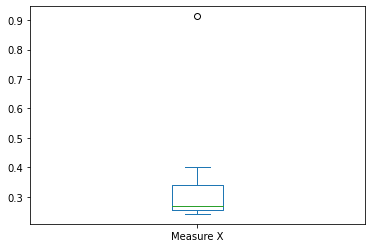

In [6]:
company['Measure X'].plot(kind='box');

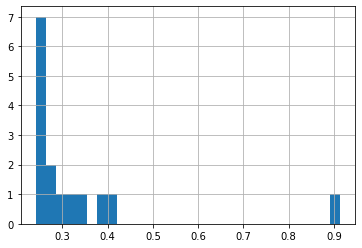

In [7]:
company['Measure X'].hist(bins=30);

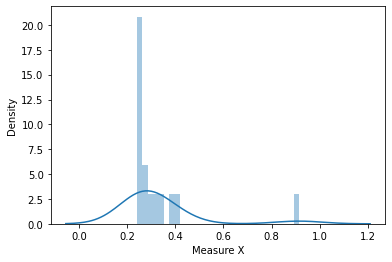

In [8]:
sns.distplot(company['Measure X'],bins=30);

In [9]:
company['Measure X'].agg(['mean','std','var'])

mean    0.332713
std     0.169454
var     0.028715
Name: Measure X, dtype: float64

# **Set-2**

>**Q 1 .**	The time required for servicing transmissions is normally distributed with $\mu$ = 45 minutes and $\sigma$ = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment? 

In [10]:
from scipy import stats

In [11]:
1-stats.norm.cdf(50,45,8)

0.26598552904870054

> **Q 2 .** The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean $\mu$ = 38 and Standard deviation $\sigma$ =6. For each statement below, please specify True/False. If false, briefly explain why

>> **Q 2 . A.** More employees at the processing center are older than 44 than between 38 and 44.

In [12]:
# employees greater than 44 years age.
1-stats.norm.cdf(44,38,6)

0.15865525393145707

In [13]:
# Employees between age 38 and 44.

stats.norm.cdf(44,38,6)-stats.norm.cdf(38,38,6)

0.3413447460685429

>> **Q 2 .B.** A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.

In [14]:
# Employees under 30 years of age.

stats.norm.cdf(30,38,6)

0.09121121972586788

In [15]:
# Employees out of 400 expected to attend the training.

400*0.09121121972586788

36.484487890347154

> **Q 4 .** Let X ~ $N(100, 20^2)$. Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99.

> **Answer:**

In [16]:
stats.norm.interval(0.99,100,20)

(48.48341392902199, 151.516586070978)

>**Q 5 .** Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions $Profit_1$ ~ $N(5, 3^2)$ and $Profit_2$ ~ $N(7, 4^2)$ respectively. Both the profits are in $ Million. 

>>Answer the following questions about the total profit of the company in Rupees. 

>>Assume that $1 = Rs. 45


## **Mean profits from two different divisions of a company**

> $\mu_1+\mu_2.$

> $\mu_1=5,\mu_2=7.$

In [17]:
Mean=5+7

print('Mean profit is in Rs.',Mean*45,'million.')

Mean profit is in Rs. 540 million.


## **Variance of profits from two different divisions of a company**

> $\sigma^2=\sqrt{\sigma_1^2 + \sigma_2^2} $

In [18]:
SD=np.sqrt((9)+(16))

In [19]:
print('Standard Deviation in Rs. is',SD*45,'Millon.')

Standard Deviation in Rs. is 225.0 Millon.


> **Q 5. A.** Specify a Rupree range (centered on the mean) such that it contains **95%** probability for the annual profit of the company.

In [20]:
print('Range in Rs. is',stats.norm.interval(0.95,540,225),'Millions.')

Range in Rs. is (99.00810347848784, 980.9918965215122) Millions.


> **Q 5. B.** Specify the $5^{th}$ percentile of the profit (in Rupees.) for the company.


>> To compute $5^{th}$ percentile, we use the formula $X=\mu+Z\times\sigma$; wherein, from z-table, $5^{th}$ percentile = -1.645.

>> $X=540+(-1.645)\times (225)$

In [21]:
X=(540+(-1.645)*225)
print('5-th percentile of the profit (in Million Rupees) is',np.round(X,0))

5-th percentile of the profit (in Million Rupees) is 170.0


> **$5^{th}$ percentile of profit (in Million Rupees) is $170**

> **Q 5. C.** Which of the two divisions has a larger probability of making a loss in a given year?

In [22]:
# Probability of division 1 making a loss P(X<0)

stats.norm.cdf(0,5,3)

0.0477903522728147

In [23]:
# Probability of division 2 making a loss P(X<0)

stats.norm.cdf(0,7,4)

0.040059156863817086

> **Division 1 has greater probability of making a loss**

# **Set-3**
> 5.	In January 2005, a company that monitors Internet traffic (WebSideStory) reported that its sampling revealed that the Mozilla Firefox browser launched in 2004 had grabbed a 4.6% share of the market.

>> **I.**	If the sample were based on 2,000 users, could Microsoft conclude that Mozilla has a less than 5% share of the market?

>>> **Solution:** Null Hypothesis, $H_0$ =Mozilla has $\geq$ 5% share of the market.

>>> Alternate Hypothesis, $H_A$= Mozilla has $<$ 5% share of the market.

>>> Apply **one-sample one-tail -test.**

In [24]:
z_score=(0.046-0.05)/(np.sqrt((0.05*(1-0.05))/2000))
z_score

-0.820782681668124

>Find probability assuming Null Hypothesis $H_0$,so as to compare with Type-1 error.

>>***p_value=stats.norm.sf(abs(z_score))***

In [25]:
p_value=stats.norm.sf(abs(z_score))
p_value

0.20588503245107104

In [26]:
stats.norm.cdf(-0.820782681668124)

0.20588503245107104

> Since **p-value** $>\alpha=0.05$, we fail to reject the null hypothesis$H_0$.

>> Hence, Mozilla has $\geq$ 5% share of the market.

>> **II.** WebSideStory claims that its sample includes all the daily Internet users. If that’s the case, then can Microsoft conclude that Mozilla has a less than 5% share of the market?

>>> **We conclude that the Mozilla has a share in the market of less than 5%.**

In [27]:
stats.norm.ppf(q=0.90)

1.2815515655446004

In [28]:
stats.norm.interval(0.95)[1]

1.959963984540054

# **Set-4**

> **Q 4.** 3.	Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been 50 with a standard deviation of 40 (in Dollars). Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between 45 and 55(in Dollars). What is the probability that in any given week, there will be an investigation?

>> n=100, population mean =50, population standard deviation = 40.
As number of samples is more than 30, we consider it a normal distribution.

>> For No Investigation $P(45<X<55)$
>> For Investigation $1-P(45<X<55)$

>> To find z-score.
z-score=$\frac{(x-\sigma)}{\frac{\mu}{\sqrt{n}}}$


In [29]:
# Find z-score at x=45

z_45=(45-50)/(40/np.sqrt(100))
z_45

-1.25

In [30]:
# Find z-score at x=55

z_55=(55-50)/(40/np.sqrt(100))
z_55

1.25

In [31]:
# For No investigation P(45<X<55) using z-scores = P(X<50)-P(X<45)

stats.norm.cdf(1.25)-stats.norm.cdf(-1.25)

0.7887004526662893

In [32]:
# For investigation 1-P(45<X<55)

1-0.7887

0.21130000000000004